#Taller N ° 3

##Finanzas computacionales


####Integrantes:
*   Gabriela Garbiras
*   Jimena Ramírez
*   Lucía Ramírez



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import statsmodels.api as sm
import cvxpy as cp
from scipy.stats import norm
!pip install --quiet pyDOE
from pyDOE import lhs
!pip install --quiet pyfinance==0.2.0
import pyfinance as pf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


######1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y con cierre a Dic-2022:
######a. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades, betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno.

In [ ]:
# Información de los activos
Acciones_1 = 'DIS', 'VZ', 'MRK', 'IBM', 'CVX'
F1_1 = '2015-12-1'
F2_1 = '2022-12-31'
Periodo = '1mo'

# Precios de cierre de los activos
Precios_1 = yf.download(Acciones_1, F1_1, F2_1, interval=Periodo)['Adj Close']

# Retornos de los activos
Retornos_1 = np.log(Precios_1/Precios_1.shift()).dropna()

# Indice Dow Jones
P_indice_1 = yf.download('^DJI', F1_1, F2_1, interval=Periodo)['Adj Close']
R_indice_1 = np.log(P_indice_1/P_indice_1.shift()).dropna()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Información de los activos
Activo_1_1 = 'DIS'
Activo_1_2 = 'VZ'
Activo_1_3 = 'MRK'
Activo_1_4 = 'IBM'
Activo_1_5 = 'CVX'

# Precios de cierre de los activos
P1 = yf.download(Activo_1_1, F1_1, F2_1, interval=Periodo)['Adj Close']
P2 = yf.download(Activo_1_2, F1_1, F2_1, interval=Periodo)['Adj Close']
P3 = yf.download(Activo_1_3, F1_1, F2_1, interval=Periodo)['Adj Close']
P4 = yf.download(Activo_1_4, F1_1, F2_1, interval=Periodo)['Adj Close']
P5 = yf.download(Activo_1_5, F1_1, F2_1, interval=Periodo)['Adj Close']

# Retornos de los activos
R1 = np.log(P1/P1.shift()).dropna()
R2 = np.log(P2/P2.shift()).dropna()
R3 = np.log(P3/P3.shift()).dropna()
R4 = np.log(P4/P4.shift()).dropna()
R5 = np.log(P5/P5.shift()).dropna()

# Indice Dow Jones
P_indice_1 = yf.download('^DJI', F1_1, F2_1, interval=Periodo)['Adj Close']
R_indice_1 = np.log(P_indice_1/P_indice_1.shift()).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
X = pd.concat([R1], axis = 1)
Y = R_indice_1
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()
print(model1.summary())

In [ ]:
X = pd.concat([R2], axis = 1)
Y = R_indice_1
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     13.03
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           0.000527
Time:                        15:01:27   Log-Likelihood:                 143.72
No. Observations:                  84   AIC:                            -283.4
Df Residuals:                      82   BIC:                            -278.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.005      1.448      0.1

In [ ]:
X = pd.concat([R3], axis = 1)
Y = R_indice_1
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     18.49
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           4.67e-05
Time:                        15:01:28   Log-Likelihood:                 146.07
No. Observations:                  84   AIC:                            -288.1
Df Residuals:                      82   BIC:                            -283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.005      0.699      0.4

In [ ]:
X = pd.concat([R4], axis = 1)
Y = R_indice_1
X = sm.add_constant(X)
model4 = sm.OLS(Y, X).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     62.06
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.22e-11
Time:                        15:01:30   Log-Likelihood:                 161.20
No. Observations:                  84   AIC:                            -318.4
Df Residuals:                      82   BIC:                            -313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.004      1.446      0.1

In [ ]:
X = pd.concat([R5], axis = 1)
Y = R_indice_1
X = sm.add_constant(X)
model5 = sm.OLS(Y, X).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     78.75
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.28e-13
Time:                        15:01:31   Log-Likelihood:                 165.80
No. Observations:                  84   AIC:                            -327.6
Df Residuals:                      82   BIC:                            -322.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.004      0.775      0.4

In [ ]:
# Variables
x = R_indice_1
y = R1
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol1= np.linalg.solve(X,Xy)
# Variables
x = R_indice_1
y = R2
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol2= np.linalg.solve(X,Xy)
# Variables
x = R_indice_1
y = R3
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol3= np.linalg.solve(X,Xy)
# Variables
x = R_indice_1
y = R4
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol4= np.linalg.solve(X,Xy)
# Variables
x = R_indice_1
y = R5
t = len(x)
unos = pd.DataFrame (np.repeat(1,t))
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
X = variables.T @ variables
Xy = variables.T @ y
Sol5= np.linalg.solve(X,Xy)

In [ ]:
# Linea superior beta, linea inferior alpha (Beta_0)
ByA1 = Sol1.T
ByA2 = Sol2.T
ByA3 = Sol3.T
ByA4 = Sol4.T
ByA5 = Sol5.T

In [ ]:
Beta1_1 = ByA1[:,0].tolist()
Alpha1_1 = ByA1[:,1].tolist()
Sigma1_1 = np.sqrt(R1.var())
Beta1_2 = ByA2[:,0].tolist()
Alpha1_2 = ByA2[:,1].tolist()
Sigma1_2 = np.sqrt(R2.var())
Beta1_3 = ByA3[:,0].tolist()
Alpha1_3 = ByA3[:,1].tolist()
Sigma1_3 = np.sqrt(R3.var())
Beta1_4 = ByA4[:,0].tolist()
Alpha1_4 = ByA4[:,1].tolist()
Sigma1_4 = np.sqrt(R4.var())
Beta1_5 = ByA5[:,0].tolist()
Alpha1_5 = ByA5[:,1].tolist()
Sigma1_5 = np.sqrt(R5.var())

In [ ]:
Betas_1 = pd.DataFrame([Beta1_1, Beta1_2, Beta1_3, Beta1_4, Beta1_5], index = Acciones_1, columns = ['Betas'])
Alphas_1 = pd.DataFrame([Alpha1_1, Alpha1_2, Alpha1_3, Alpha1_4, Alpha1_5], index = Acciones_1, columns = ['Intercepto'])
Sigmas_1 = pd.DataFrame([Sigma1_1, Sigma1_2, Sigma1_3, Sigma1_4, Sigma1_5], index = Acciones_1, columns = ['Volatilidades'])

In [ ]:
MI_1 = R_indice_1.mean()
MI_1

0.007655382368731445

In [ ]:
# coeficiente de determinación
CD1 = model1.rsquared
CD2 = model2.rsquared
CD3 = model3.rsquared
CD4 = model4.rsquared
CD5 = model5.rsquared

In [ ]:
# DataFrames para la tabla final
R_1_esperados = pd.DataFrame([R1.mean(),R2.mean(),R3.mean(),R4.mean(),R5.mean()], index = Acciones_1, columns=['Retornos Esperados'])
R_1_estimados = pd.DataFrame([Beta1_1[0]*R_indice_1.mean(), Beta1_2[0]*R_indice_1.mean(), Beta1_3[0]*R_indice_1.mean(), Beta1_4[0]*R_indice_1.mean(), Beta1_5[0]*R_indice_1.mean()], index = Acciones_1, columns = ['Retornos Estimados CAPM'])
CD_1 = pd.DataFrame([CD1, CD2, CD3, CD4, CD5], index = Acciones_1, columns = ['Coeficientes de determinación']) 

In [ ]:
Punto1a = pd.concat([R_1_esperados, Alphas_1, Sigmas_1, Betas_1, R_1_estimados, CD_1], axis = 1)
Punto1a

,Retornos Esperados,Intercepto,Volatilidades,Betas,Retornos Estimados CAPM,Coeficientes de determinación
DIS,-0.001495,1.208435,0.081489,-0.010746,-0.000082,0.493039
VZ,0.001907,0.395435,0.050571,-0.001120,-0.000009,0.137086
MRK,0.012008,0.513930,0.056725,0.008074,0.000062,0.184036
IBM,0.004567,0.997228,0.071941,-0.003067,-0.000023,0.430795
CVX,0.011816,1.218614,0.082440,0.002487,0.000019,0.489885


b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del CAPM y las betas de los activos.

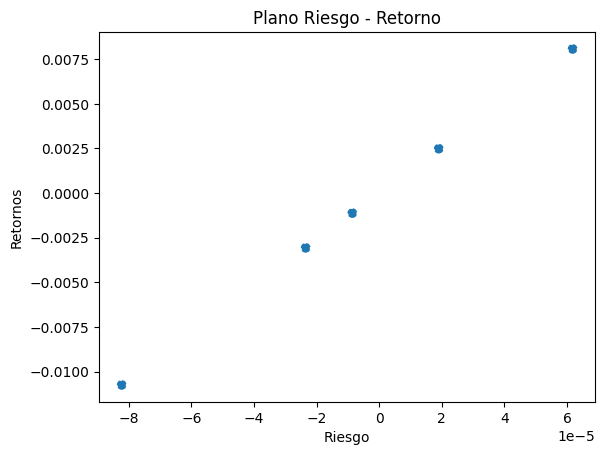

In [ ]:
# Punto 1b 
fi,ax=plt.subplots();
ax.scatter(R_1_estimados, Betas_1, ls='--',marker='o')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retornos')
ax.set_title('Plano Riesgo - Retorno')
plt.show()

Punto opcional: estime los retornos de los cinco activos usando el modelo de Fama-French. Compare los resultados con el modelo CAPM.

######2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).

In [ ]:
Acciones_2 = 'AAPL','V', 'MSFT', 'CSCO', 'AXP'
F_1_2 = '2014-12-1'
F_2_2 = '2022-12-31'
Periodicidad_2 = '1mo'

Precios_2 = yf.download(Acciones_2, F_1_2, F_2_2, interval = Periodicidad_2)['Adj Close']
Retornos_2 = np.log(Precios_2/Precios_2.shift()).dropna()
P_indice_2 = yf.download('^DJI', F_1_2, F_2_2, interval = Periodicidad_2)['Adj Close']
R_indice_2 = np.log(P_indice_2/P_indice_2.shift()).dropna()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Portafolio Tangente 
Mcov_2 = Retornos_2.cov()
Mcov_2 = np.array(Mcov_2)
vretornos_2 = np.array(Retornos_2.mean())
ones_2 = np.ones(5)
Mcov_2_inv = np.linalg.inv(Mcov_2)
Vpesos = Mcov_2_inv*ones_2

n = len(vretornos_2)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, Mcov_2))
restricciones = [x @ vretornos_2 == 1, x @ vretornos_2 >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
Sharpe_2 = x.value/sum(x.value)
pesos2 = round(pd.DataFrame(Sharpe_2).T,4)

######a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota: tomar solo posiciones largas en el portafolio.

Text(0.5, 1.0, 'Plano riesgo retorno del portafolio de sharpe')

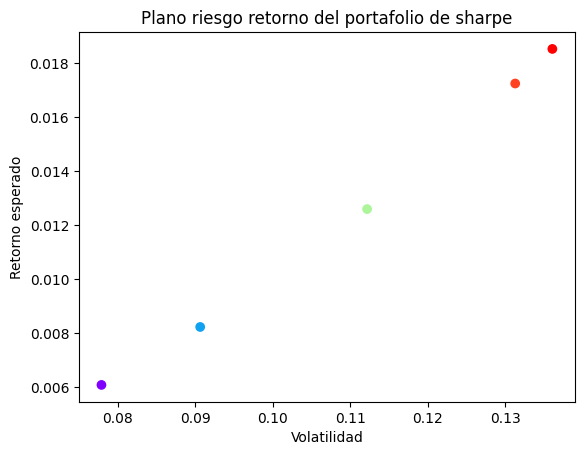

In [ ]:
plt.scatter(np.sqrt(vretornos_2), vretornos_2, c=vretornos_2 / np.sqrt(vretornos_2), marker='o', cmap='rainbow');
plt.xlabel('Volatilidad')
plt.ylabel('Retorno esperado')
plt.title('Plano riesgo retorno del portafolio de sharpe')

######b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo estándar o paramétrico.

In [ ]:
# Nivel de confianza 95%
rp = (Retornos_2 @ Sharpe_2).mean()
sigmap = (Retornos_2 @ Sharpe_2).std()
alpha2_1 = 0.05
VaRp2_1 = rp - norm.ppf(1-alpha2_1)*sigmap 
VaRp2_1

-0.08574241565360559

In [ ]:
# Nivel de confianza 99%
alpha2_2 = 0.01
VaRp2_2 = rp - norm.ppf(1-alpha2_2)*sigmap 
VaRp2_2

-0.12973330455189921

######c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo de estimación histórica.

In [ ]:
alpha = 0.05 # Nivel de confianza
Hr2 = Retornos_2[-5:] 
VaRh2 = -np.percentile(Hr2, 5)
VaRh2

0.12589946777523514

In [ ]:
alpha = 0.01 # Nivel de confianza
Hr2_2 = Retornos_2[-5:] 
VaRh2_2 = -np.percentile(Hr2_2, 1)
VaRh2_2

0.12847229813473052

######d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000 portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

In [ ]:
NS = 10000
pesos_simulados = np.random.dirichlet(np.ones(len(Retornos_2.columns)), NS)
retornos_simulados = np.dot(Retornos_2, pesos_simulados.T)
volatilidades_simulados = np.sqrt(np.diag(np.dot(np.dot(pesos_simulados, Mcov_2), pesos_simulados.T)))
alpha = 0.95
VaR_MC = np.percentile(-retornos_simulados, alpha*100)
VaR_MC

0.09469756977070634

In [ ]:
# El VaR del portafokio aletorio generado por montecarlo es
VaR_MC

0.09469756977070634

######e. ¿Se encuentran diferencias significativas entre este portafolio óptimo construido a partir de Monte Carlo y el portafolio tangente de la optimización?

In [ ]:
# si ya que el portafolio tangente tiene un CVaR de 0.12589946777523514, mientras que el portafolio aletorio montecarlo tiene 
# un CVaR de 0.09469756977070634 teniendo en cuenta un alpha de 5%

######3. Los precios de activos riesgos en el mercado describen un proceso estocástico que satisface:
$$S_t = S_0 exp[(μ– 1/2σ^2)dt + σ dW_t]$$
Donde: $μ$ es la tasa de retorno del activo, σ es su volatilidad y Wt es un proceso estándar de Wiener. A partir de esta expresión es posible simular el precio del activo en algún instante de tiempo t.

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022, estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente gráficamente las primeras 20 trayectorias del proceso.

Nota: tome como S0 el precio de Dic-2022 y los parámetros estimados a partir de la muestra de datos.

In [ ]:
# Información 
Activo3 = 'AAPL'
Fi_3 = '2018-12-1'
Ff_3 = '2022-12-31'
mes = '1mo'
Precio3 = yf.download(Activo3, Fi_3, Ff_3, mes)['Adj Close']
Retornos3 = np.log(Precio3/Precio3.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

Text(0, 0.5, 'Precio')

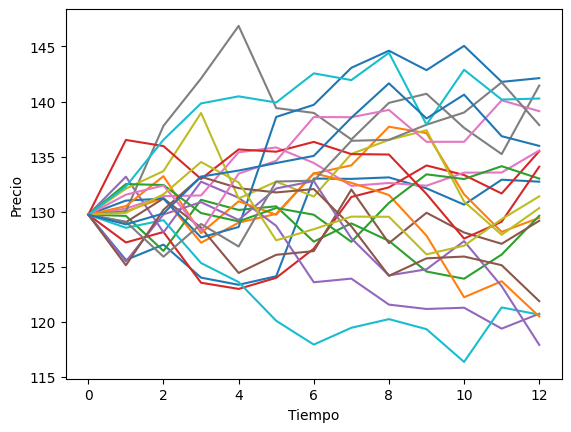

In [ ]:
mu = Retornos3.mean()*12
sigma = Retornos3.std()*np.sqrt(12)
T = 1
S0 = Precio3[-1]
NS = 10000
M = 12
St3 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St3[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio')

b. Construya el histograma de los precios y retornos al final del periodo (t = 1). ¿qué puedeconcluir de la forma de los histogramas?

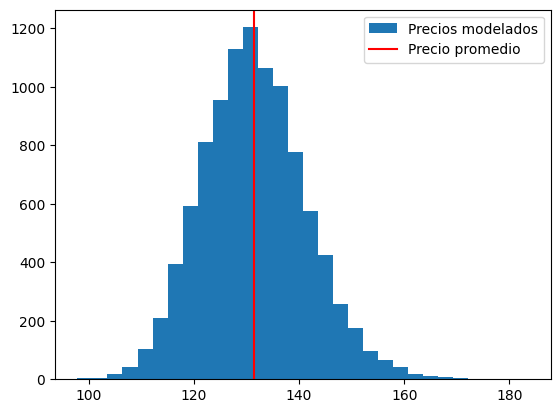

In [ ]:
plt.hist(St3[:,-1], bins=30, label='Precios modelados')
plt.axvline(St3[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();

In [ ]:
S0
# Los retornos modelados cuentan con un sesgo hacia la izquierda y dado que el precio es de 129.73, se le recomienda invertir para aumentar
# su capital

129.73191833496094

c. Demuestre que el valor del precio simulado de la acción en T converge a $ST exp{μ T}.$

In [ ]:
S0 * np.exp(mu * T) 

131.36467141657045

In [ ]:
St3[:,-1].mean()  

131.45372788562443

In [ ]:
# El valor es similar, ya que la única diferencia son sus decimales

d. Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [ ]:
d3 = St3[:,-1]
len(d3[d3 < S0])/NS*100
# La probabilidad de que el precio de la acción sea inferior a S0 se encuentra en esta linea de código en valores porcentuales

44.57

#####4. Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de estos se encuentra el proceso *Ornstein-Uhlenbeck*, que es un proceso Xt que satisface:

$$X_(t+dt) = X_t + (μ–X_t)dt + σ(W_t+dt − Wt)$$

a. Utilice el método de Monte Carlo para realizar una simulación de 100 posibles trayectorias (NS) de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ = 0. 3, T = 5, NS = 100, dt = T/m. Presente gráficamente los resultados para las primeras 10 trayectorias del proceso.

In [ ]:
X0 = 1
def PathsOU(X0,mu,sigma,T,NS,M):
    Z = np.random.normal(0.0,1.0,[NS,M])
    X = np.zeros([NS, M+1])
    X0 = X[:,0]
    dt = T / M
    k=1
    std_dt = np.sqrt(sigma*2 / (2*k) * (1-np.exp(-2*k*dt)))
    for t in range(0,M):
         X[:,t+1] = mu + np.exp(-k*dt)*(X[:,t]-mu) + std_dt * Z[:,t]
    return X

Text(0, 0.5, 'Precio')

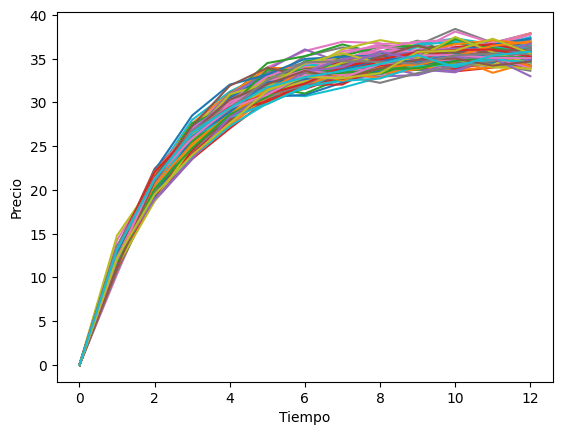

In [ ]:
T = 5 
mu = 3*12
sigma = 0.3*np.sqrt(12)
X0 = 1
NS = 100
M = 12
Xt = PathsOU(X0,mu,sigma,T,NS,M)

plt.plot(np.transpose(Xt)) 
plt.xlabel('Tiempo')
plt.ylabel('Precio')

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo plazo?

In [ ]:
# Este va a presentar una tendendencia logarítmica positiva en la gran mayoría de sus casos

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso Ornstein-Uhlenbeck?

Text(0.5, 0, 'Tiempo')

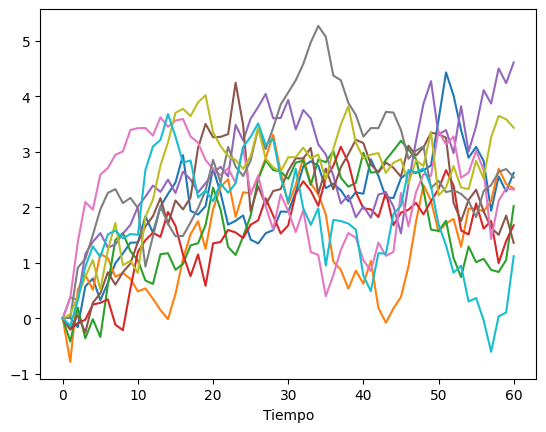

In [ ]:
T2 = 5 
mu2 = 3*12
sigma2 = 0.3*np.sqrt(12)
X02 = 1
NS2 = 10
M2 = 12
Xt2 = PathsOU(X02,mu2,sigma2,T2,NS2,M2)

Xt2
plt.plot(np.transpose(Xt2)) 
plt.xlabel("Tiempo")

d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa corta de interés. Por ejemplo, si rt denota el valor de la tasa corte de interés en el mercado, esta se puede modelar como:
$$rt+dt = rt + (μ– rt)dt + σ(Wt+dt − Wt)$$

Teniendo en cuenta los siguientes parámetros: r0 = 0. 03, μ = 0. 05, σ = 0. 15, T = 1, NS = 100, dt = T/m; simule 100 posibles valores de la tasa de corta en el instante T = 1, y utilice el valor promedio obtenido para valorar un bono cero cupón y facial 100 con vencimiento en T. Presente gráficamente los resultados para las primeras 10 trayectorias del
proceso.

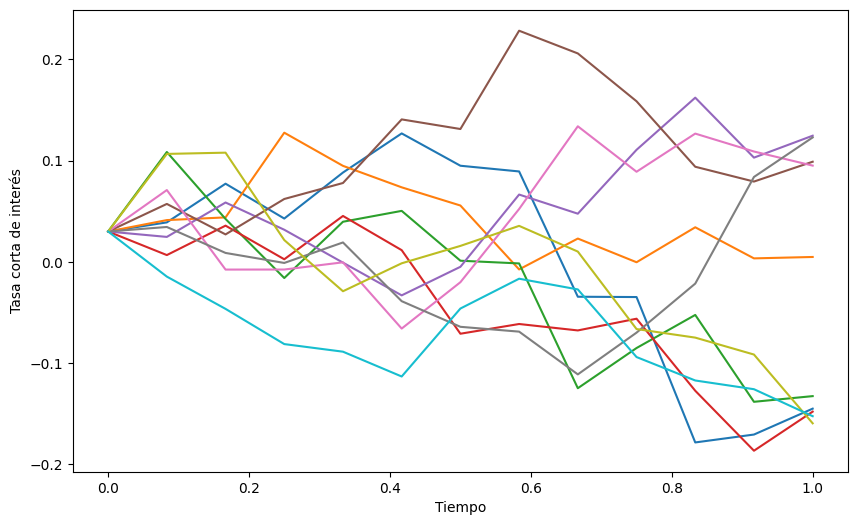

In [ ]:
r0 = 0.03
mu = 0.05
sigma = 0.15
T = 1
NS = 100
m = 12
dt = T/m

r = np.zeros((NS, m+1))
r[:,0] = r0
for i in range(NS):
    for j in range(m):
        r[i,j+1] = r[i,j] + (mu - r[i,j])*dt + sigma*np.random.normal()*np.sqrt(dt)
plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(np.linspace(0,T,m+1), r[i,:], label=f"Trayectoria {i+1}")
plt.xlabel("Tiempo")
plt.ylabel("Tasa corta de interés")
plt.show()

In [ ]:
Precio = np.exp(-r[:, -1]*T)*100
print(f"El precio del bono cero cupón y facial es: {np.mean(Precio):.4f}")

El precio del bono cero cupón y facial es: 96.3117


######5. Escoja tres de los siguientes activos.
######i. Gold futures (GC=F)
######ii. Brent Oil futures (BZ=F)
######iii. US Treasury Bill (^IRX)
######iv. EURUSD currency (EURUSD=X)
######v. GBPUSD currency (GBPUSD=X)
######vi. Coffee futures (KC=F)
######vii. Natural gas (NG=F)
######viii. Cooper (HG=F)

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año 2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso estocástico tipo MGB o de reversión a la media tipo OU.

La selección del proceso debe incorporar:

a. La gráfica de las series históricas de los precios

b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

c. Los resultados de la simulación

In [ ]:
activos5 = ('NG=F', '^IRX', 'KC=F')
f1_5 = '2004-12-01'
f2_5 = '2022-12-31'
precio5 = yf.download(activos5, f1_5, f2_5, interval="1Mo")["Adj Close"]
Retornos5 = np.log(precio5/precio5.shift()).dropna()

[*********************100%***********************]  3 of 3 completed


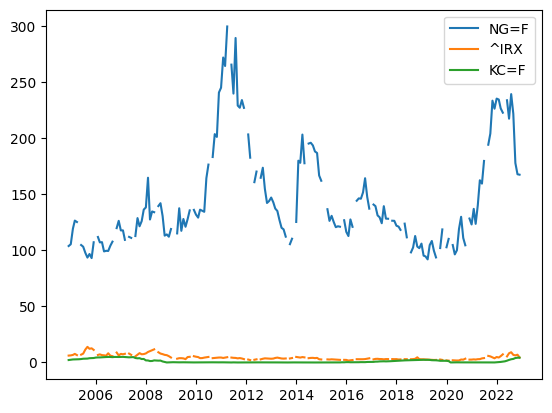

In [ ]:
plt.plot(precio5)
plt.legend(activos5)

Text(0, 0.5, 'Precio')

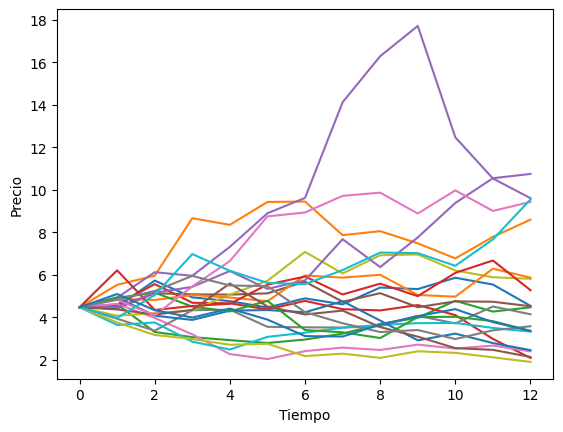

In [ ]:
mu = Retornos5['NG=F'].mean()*12
sigma = Retornos5['NG=F'].std()*np.sqrt(12)
T = 1
S0 = precio5['NG=F'][-1]
NS = 100
M = 12
St5_1 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St5_1[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio')

Text(0, 0.5, 'Precio')

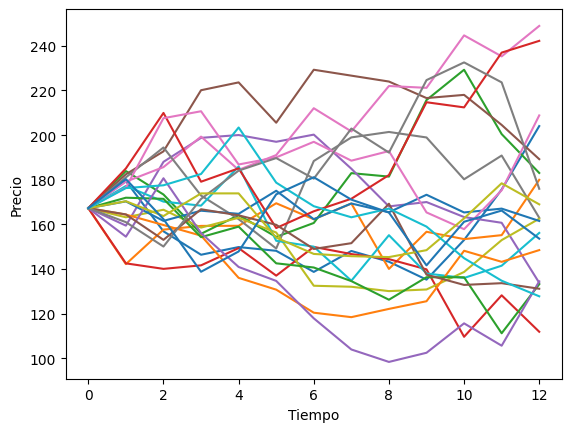

In [ ]:
mu = Retornos5['KC=F'].mean()*12
sigma = Retornos5['KC=F'].std()*np.sqrt(12)
T = 1
S0 = precio5['KC=F'][-1]
NS = 100
M = 12
St5_2 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St5_2[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio')

Text(0, 0.5, 'Precio')

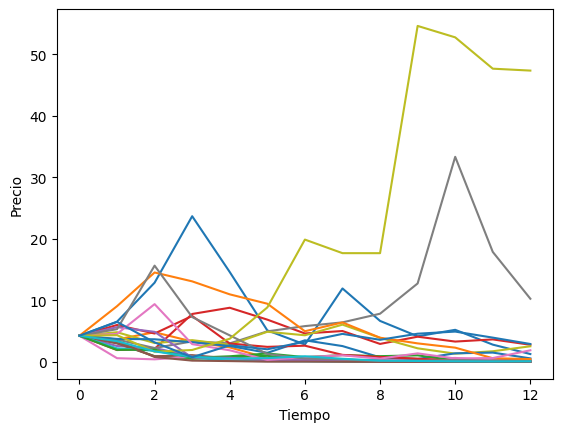

In [ ]:
mu = Retornos5['^IRX'].mean()*12
sigma = Retornos5['^IRX'].std()*np.sqrt(12)
T = 1
S0 = precio5['^IRX'][-1]
NS = 100
M = 12
St5_3 = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St5_3[0:21, :])) 
plt.xlabel("Tiempo");
plt.ylabel('Precio')

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
pruebadf1 = adfuller(precio5['NG=F'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.038449
P-value: 0.031456
Citical values:
	1%: -3.468062
	5%: -2.878106
	10%: -2.575602


In [ ]:
# Al tomarse un nivel de significancia de 1%, el valor-p (0,03) es mayor que el 1%, por lo tanto es no estacionaria

In [ ]:
pruebadf2 = adfuller(precio5['KC=F'])  
print("ADF test: %f" % pruebadf2[0])
print("P-value: %f" % pruebadf2[1])
print("Citical values:")
for key, value in pruebadf2[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.276489
P-value: 0.015963
Citical values:
	1%: -3.467211
	5%: -2.877735
	10%: -2.575403


In [ ]:
# Al tomarse un nivel de significancia de 1%, el valor-p (0,015) es mayor que el 1%, por lo tanto es no estacionaria

In [ ]:
pruebadf3 = adfuller(precio5['^IRX'])  
print("ADF test: %f" % pruebadf3[0])
print("P-value: %f" % pruebadf3[1])
print("Citical values:")
for key, value in pruebadf3[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.982004
P-value: 0.294519
Citical values:
	1%: -3.461727
	5%: -2.875337
	10%: -2.574124


In [ ]:
# Al tomarse un nivel de significancia de 5%, el valor-p (0,29) es mayor que el 5%, por lo tanto es no estacionaria

In [ ]:
St5_1[:,-1].mean()

5.043754182647184

In [ ]:
St5_2[:,-1].mean()

170.5989162626351

In [ ]:
St5_3[:,-1].mean()

3.1947685557311